<a href="https://colab.research.google.com/github/PaolaSanchezCastillo/Ejercicios/blob/master/Copia_de_PracticaRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Práctica: Pronóstico con regresión lineal múltiple (RLM)**

Nombre: Sanchez Castillo Paola

Email: paolaescastillo@gmail.com

### **Caso de estudio**

Se tienen mediciones de registros geofísicos convencionales: RC1 (Registro Neutrón), RC2 (Registro Sónico), RC3 (Registro Densidad-Neutrón) y RC4 (Registro Densidad -corregido por arcilla-)

Objetivo: Se desea obtener el pronóstico de la saturación de aceite remanente (ROS, Residual Oil Saturation)

**1) Se importan las bibliotecas necesarias**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb           #Biblioteca para visualización de datos basado en matplotlib
#Para generar las gráficas dentro del notebook
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RegistrosGeo = pd.read_table('/content/drive/MyDrive/Mineria/RGeofisicosCompleto.txt')
RegistrosGeo

,Profundidad,RC1,RC2,RC3,RC4
0,5640.0,0.717385,0.713316,0.616325,0.410210
1,5640.5,0.743087,0.710623,0.645028,0.376343
2,5641.0,0.765662,0.710635,0.678662,0.423117
3,5641.5,0.784098,0.667974,0.707599,0.460672
4,5642.0,0.790520,0.681443,0.718382,0.488054
...,...,...,...,...,...
63,5677.0,0.716311,0.734232,0.650890,0.676664
64,5677.5,0.712586,0.747234,0.613715,0.666385
65,5678.0,0.718184,0.761320,0.568504,0.644622
66,5679.5,0.712518,0.696722,0.598481,0.673889


**2) Gráfica de las mediciones de ROS**

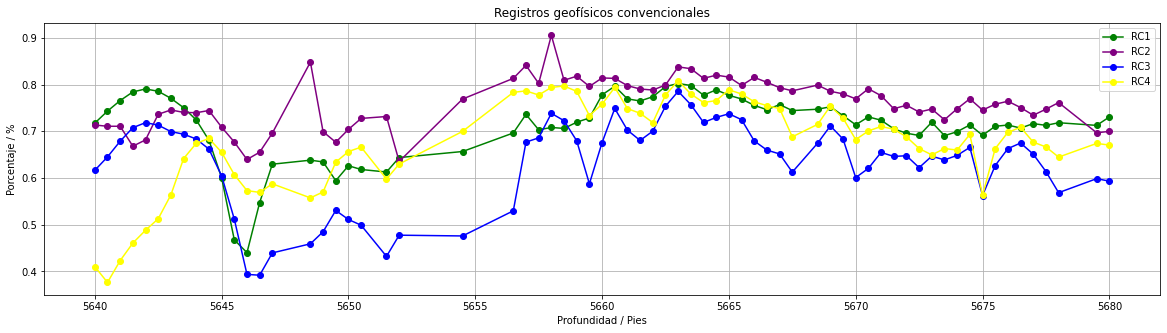

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC1'], color='green', marker='o', label='RC1')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC2'], color='purple', marker='o', label='RC2')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC3'], color='blue', marker='o', label='RC3')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC4'], color='yellow', marker='o', label='RC4')
plt.xlabel('Profundidad / Pies')
plt.ylabel('Porcentaje / %')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

**3) Se importan las bibliotecas para generar el modelo de regresión**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, max_error

**4) Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)**

In [ ]:
X_train = np.array(RegistrosGeo[['Profundidad', 'RC1', 'RC2','RC3']])
pd.DataFrame(X_train)

,0,1,2,3
0,5640.0,0.717385,0.713316,0.616325
1,5640.5,0.743087,0.710623,0.645028
2,5641.0,0.765662,0.710635,0.678662
3,5641.5,0.784098,0.667974,0.707599
4,5642.0,0.790520,0.681443,0.718382
...,...,...,...,...
63,5677.0,0.716311,0.734232,0.650890
64,5677.5,0.712586,0.747234,0.613715
65,5678.0,0.718184,0.761320,0.568504
66,5679.5,0.712518,0.696722,0.598481


In [ ]:
Y_train = np.array(RegistrosGeo[['RC4']])
pd.DataFrame(Y_train)

,0
0,0.410210
1,0.376343
2,0.423117
3,0.460672
4,0.488054
...,...
63,0.676664
64,0.666385
65,0.644622
66,0.673889


**5) Se define el algoritmo a utilizar**

In [ ]:
#Algoritmo: Regresión Lineal Múltiple
RMultiple = linear_model.LinearRegression()

In [ ]:
#Se entrena el modelo
RMultiple.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Se genera el pronóstico
Y_pronostico = RMultiple.predict(X_train)
pd.DataFrame(Y_pronostico)

,0
0,0.549836
1,0.541627
2,0.540379
3,0.488129
4,0.505622
...,...
63,0.693586
64,0.700451
65,0.700001
66,0.639429


In [ ]:
#Obtención de los coeficienetes, intercepto y bondad de ajuste
print('Coeficientes: \n', RMultiple.coef_)
print('Intercepto: \n', RMultiple.intercept_)
print("Error residual: %.4f" % max_error(Y_train, Y_pronostico))
print('Bondad de ajuste (Score): %.2f' % r2_score(Y_train, Y_pronostico))

Coeficientes: 
 [[ 0.00285743 -0.63047181  1.21856934  0.34313508]]
Intercepto: 
 [-16.19448208]
Error residual: 0.1768
Bondad de ajuste (Score): 0.66


**6) Gráfica de las mediciones de ROS y los valores pronosticados**




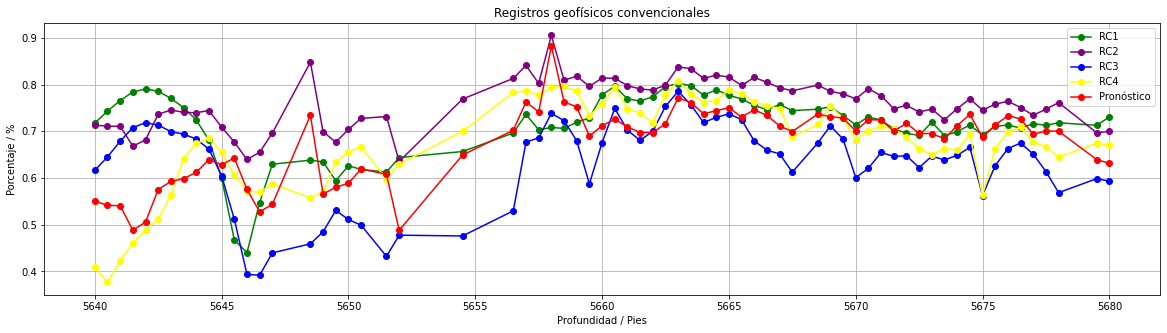

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC1'], color='green', marker='o', label='RC1')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC2'], color='purple', marker='o', label='RC2')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC3'], color='blue', marker='o', label='RC3')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC4'], color='yellow', marker='o', label='RC4')
plt.plot(RegistrosGeo['Profundidad'], Y_pronostico, color='red', marker='o', label='Pronóstico')
plt.xlabel('Profundidad / Pies')
plt.ylabel('Porcentaje / %')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

7) Modelo de regresión

Y = a + b1Profundidad + b2RC1 + b3RC2 + u

Y = 0.2623 − 0.000075Profundidad + 0.5066RC1 + 0.2274RC2 + 0.4890RC3 + 0.0684